<a href="https://colab.research.google.com/github/SawsanYusuf/The_Price_of_Netflix_Stocks/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Regression with Time-Series Data

In [ ]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader.data as web
import plotly.express as px
import seaborn as sns
import pytz
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
%matplotlib inline

## 1. Prepare

### 1.1 Import Data

In [3]:
#Get the stock quote
dataset = web.DataReader('NFLX', data_source='yahoo' )
#show the data
dataset

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-10-23,194.899994,191.029999,194.169998,192.470001,6980000,192.470001
2017-10-24,196.740005,191.399994,192.750000,196.020004,7069100,196.020004
2017-10-25,197.059998,193.009995,195.380005,193.770004,5315300,193.770004
2017-10-26,197.610001,194.080002,194.660004,195.210007,5185800,195.210007
2017-10-27,200.649994,196.220001,197.199997,199.539993,8128600,199.539993
...,...,...,...,...,...,...
2022-10-14,238.800003,229.509995,237.800003,230.000000,15275700,230.000000
2022-10-17,249.919998,234.399994,234.410004,245.100006,21057800,245.100006
2022-10-18,250.369995,237.729996,249.800003,240.860001,25776700,240.860001


In [4]:
df = pd.DataFrame(dataset["Close"])
df.head()

,Close
Date,
2017-10-23,192.470001
2017-10-24,196.020004
2017-10-25,193.770004
2017-10-26,195.210007
2017-10-27,199.539993


In [5]:
print(df.shape)
df.info()

(1258, 1)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2017-10-23 to 2022-10-20
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1258 non-null   float64
dtypes: float64(1)
memory usage: 19.7 KB


### 1.2 Explore Data

#### Descriptive Statistical Analysis

In [6]:
df.describe()

,Close
count,1258.000000
mean,384.006896
std,123.870664
min,166.369995
25%,294.207497
50%,361.865005
75%,494.557503
max,691.690002


#### Analyzing Using Visualization

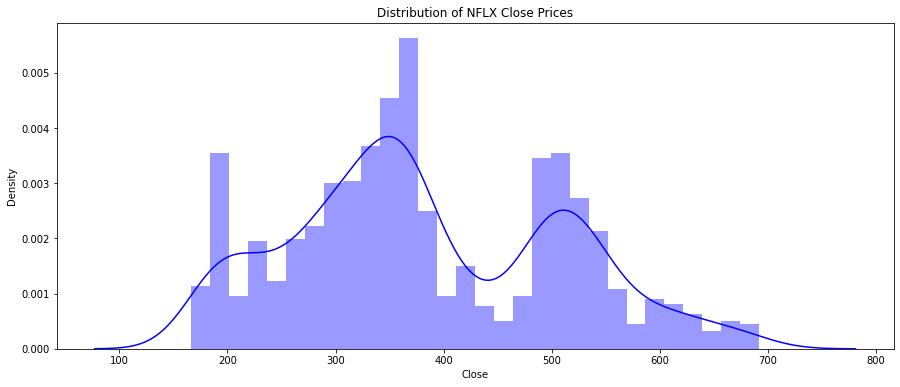

In [7]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.distplot(df["Close"], kde = True, color = 'blue', bins = 30, ax = ax)
ax.set_title("Distribution of NFLX Close Prices");

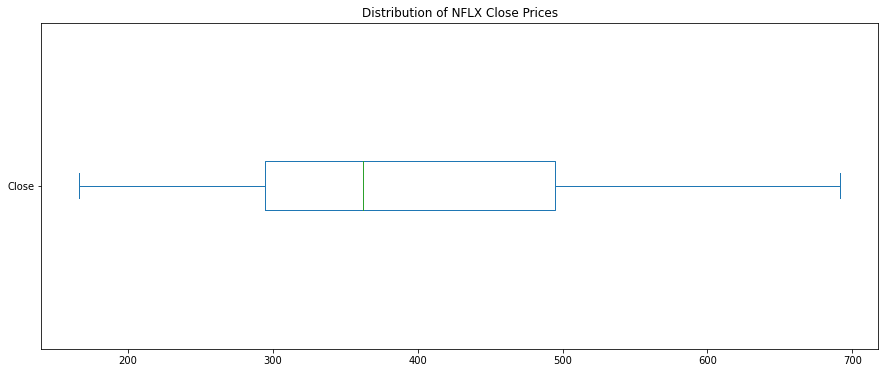

In [8]:
fig, ax = plt.subplots(figsize=(15, 6))
df["Close"].plot(kind="box", vert=False, title="Distribution of NFLX Close Prices",ax=ax);

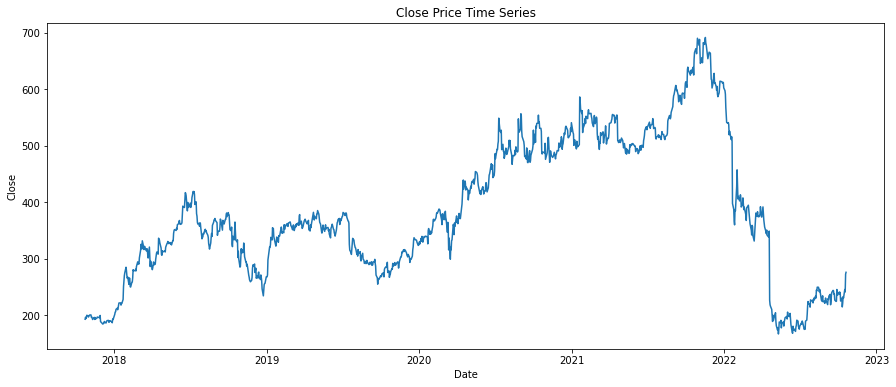

In [10]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(x = df.index, y = df['Close'], data = df, ax=ax)
ax.set_title("Close Price Time Series");

In [12]:
df= df["Close"]. resample("1D").mean().fillna(method="ffill").to_frame()

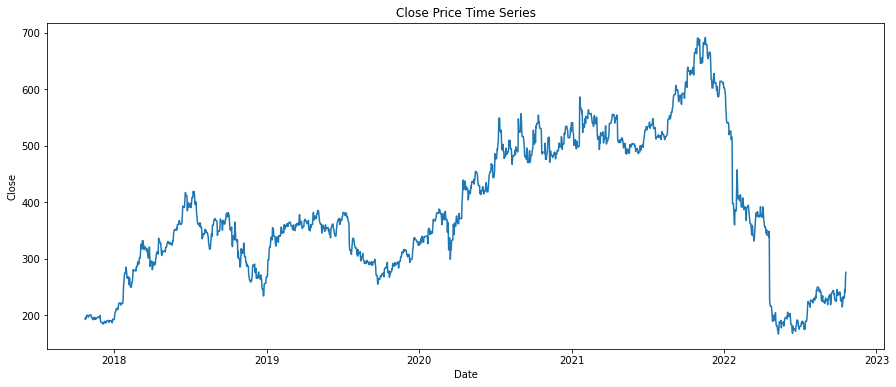

In [14]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(x = df.index, y = df['Close'], data = df, ax=ax)
ax.set_title("Close Price Time Series");

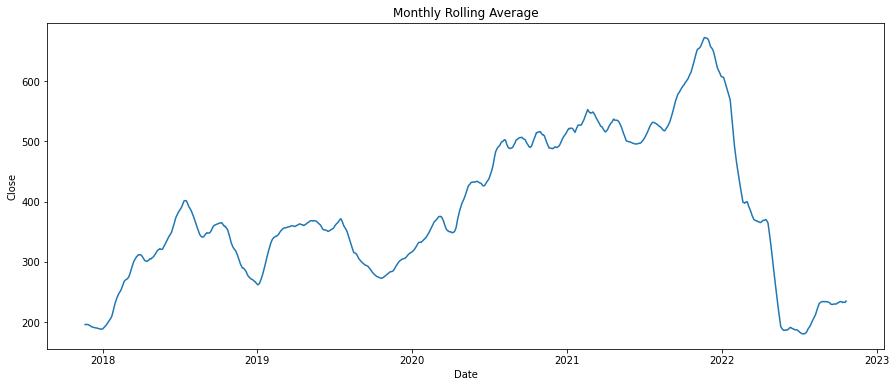

In [18]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(x = df.index, y = df["Close"].rolling(30).mean(), data = df, ax=ax)
ax.set_title("Monthly Rolling Average");

In [20]:
df["Close.L1"] = df["Close"].shift(1)
df.dropna(inplace = True)
df.head()

,Close,Close.L1
Date,,
2017-10-24,196.020004,192.470001
2017-10-25,193.770004,196.020004
2017-10-26,195.210007,193.770004
2017-10-27,199.539993,195.210007
2017-10-28,199.539993,199.539993


In [21]:
df.corr()

,Close,Close.L1
Close,1.000000,0.997267
Close.L1,0.997267,1.000000


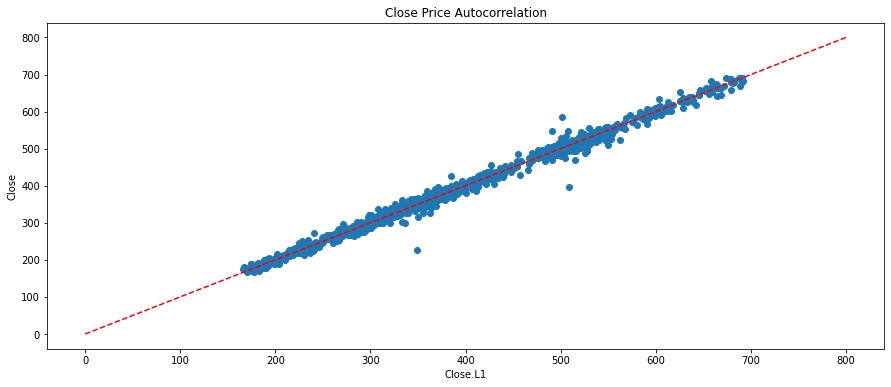

In [23]:
fig, ax = plt.subplots(figsize=(15, 6))
ax.scatter(x=df["Close.L1"], y=df["Close"])
ax.plot([0,800],[0,800],linestyle="--", color="red")
plt.xlabel("Close.L1")
plt.ylabel("Close")
plt.title("Close Price Autocorrelation");

### 1.3 Split Data

In [24]:
target = "Close"
y = df[target]
X = df.drop(columns= target)

In [25]:
cutoff = int(len(X) * 0.8)
X_train, y_train = X.iloc[:cutoff], y.iloc[:cutoff]
X_test, y_test = X.iloc[cutoff:], y.iloc[cutoff:]

## 2. Build Model

### 2.1 Baseline

In [26]:
y_pred_baseline = [y_train.mean()] * len(y_train)
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)
print("Mean Close Prices:", round(y_train.mean(), 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean Close Prices: 390.9
Baseline MAE: 91.78


### 2.2 Iterate

In [27]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### 2.3 Evaluate

In [28]:
training_mae = mean_absolute_error(y_train, model.predict(X_train))
test_mae = mean_absolute_error(y_test, model.predict(X_test))
print("Training MAE:", round(training_mae, 2))
print("Test MAE:", round(test_mae, 2))

Training MAE: 4.85
Test MAE: 6.31


## 3. Results

In [29]:
intercept = model.intercept_.round(2)
coefficient = model.coef_.round(2)[0]
print(f"P2 = {intercept} + ({coefficient} * Close.L1)")

P2 = 1.27 + (1.0 * Close.L1)


In [30]:
df_pred_test = pd.DataFrame(
             {
             "y_test": y_test,
             "y_pred": model.predict(X_test)
             }
)
df_pred_test.head()

,y_test,y_pred
Date,,
2021-10-21,653.159973,624.854533
2021-10-22,664.780029,652.804930
2021-10-23,664.780029,664.396139
2021-10-24,664.780029,664.396139
2021-10-25,671.659973,664.396139


In [31]:
fig = px.line(df_pred_test, labels= {"value": "Close Price"})
fig.show()